In [329]:
import numpy as np
import matplotlib.pyplot as plt

In [330]:
f = np.array([3, 7, 14, 23, 36, 47], dtype=float)
np.gradient(f)

array([ 4. ,  5.5,  8. , 11. , 12. , 11. ])

In [331]:
print(f[1] - f[0], f[-1] - f[-2])

4.0 11.0


In [332]:
print((f[2] - f[0])/2)
print((f[3] - f[1])/2)
print((f[4] - f[2])/2)
print((f[5] - f[3])/2)

5.5
8.0
11.0
12.0


In [333]:
np.gradient(f, 2)

array([2.  , 2.75, 4.  , 5.5 , 6.  , 5.5 ])

In [334]:
for i in range(1, len(f) - 1):
    print((f[i + 1] - f[i - 1]) / (2*2))

2.75
4.0
5.5
6.0


In [335]:
f = np.array([8, 2, 8, 3, 5, 6, 5, 15])
gr = np.gradient(f, 7)

In [336]:
gr[7]

1.4285714285714286

In [337]:
def fun(x, y, a=1, b=1):
    return a*(x**2) + b*(y**2)

def grad(x, y, a=1, b=1):
    return np.array([2*a*x, 2*b*y])

In [338]:
x = np.random.uniform(0, 3, size =2)
lst = []
lst.append(x)
print(lst, lst[-1][0], lst[-1][1])


[array([1.99749709, 1.33502603])] 1.9974970904953677 1.3350260349962617


In [339]:
def grad_descend(grad, step_size=.2, num_steps=30):
    
    lst = []
    x = np.random.uniform(0, 3, size=2)
    lst.append(x)
    
    for i in range(num_steps):
        x = x - step_size*grad(lst[-1][0], lst[-1][1])
        lst.append(x)
        
    return np.array(lst)

In [340]:
def plot_grad(fun, trace):
    fig = plt.figure(figsize=(10, 8))
    x_ = np.linspace(-1, 1, 100)
    y_ = np.linspace(-1, 1, 100)
    x, y = np.meshgrid(x_, y_)
    z = fun(x, y)
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.plot_surface(x, y, z, alpha=0.6)
    ax.contour(x, y, z, zdir='z', offset=z.min())
    z_trace = fun(trace[:, 0], trace[:, 1])
    ax.plot(trace[:, 0], trace[:, 1], z_trace, "o-")
    ax.set_xlim(x.min(), x.max())
    ax.set_ylim(y.min(), y.max())
    ax.set_zlim(z.min(), z.max())

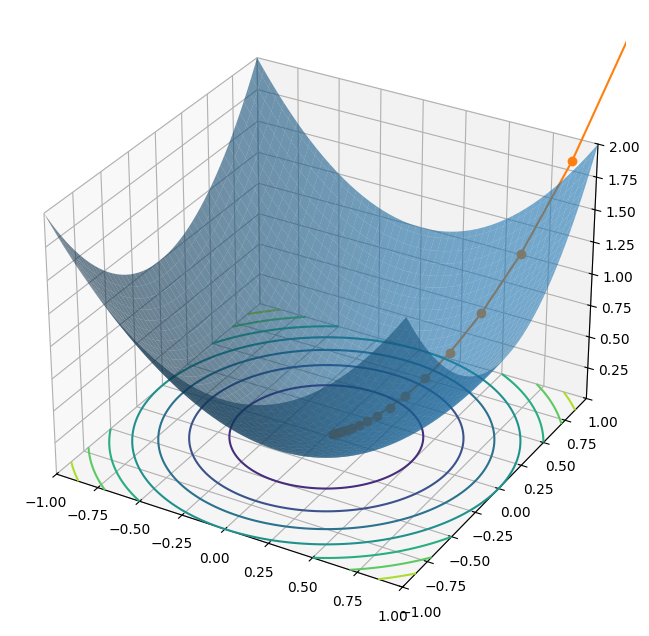

In [341]:
trace = grad_descend(grad, 0.1, 20)
plot_grad(fun, trace = trace)

In [342]:
def f(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def grad(x, y):
    dx = 2 * x -2 + 100 * (-4 * y *x + 4 * x**3)
    dy = 100 * (2 * y - 2 * x**2)
    return (dx, dy)

In [343]:
x0 = (0, 0)
gamma = 0.001
x_cur = x0

vals = []
coords = []
i = 0

while True:
    
    x_new = (x_cur[0] - gamma * grad(*x_cur)[0],
             x_cur[1] - gamma * grad(*x_cur)[1])
    
    if i > 50000:
        break
    
    x_cur = x_new
    vals.append(f(*x_cur))
    coords.append(x_cur)
    i +=1
    
    print(f'iter={i}; x=({x_cur[0]:.4f}, {x_cur[1]:.4f}); '
          f' f(x)={f(*x_cur):.4f}; grad f(x)=({grad(*x_cur)[0]:.4f}, {grad(*x_cur)[1]:.4f})')

iter=1; x=(0.0020, 0.0000);  f(x)=0.9960; grad f(x)=(-1.9960, -0.0008)
iter=2; x=(0.0040, 0.0000);  f(x)=0.9920; grad f(x)=(-1.9920, -0.0030)
iter=3; x=(0.0060, 0.0000);  f(x)=0.9881; grad f(x)=(-1.9879, -0.0064)
iter=4; x=(0.0080, 0.0000);  f(x)=0.9841; grad f(x)=(-1.9839, -0.0107)
iter=5; x=(0.0100, 0.0000);  f(x)=0.9802; grad f(x)=(-1.9798, -0.0157)
iter=6; x=(0.0119, 0.0000);  f(x)=0.9763; grad f(x)=(-1.9756, -0.0212)
iter=7; x=(0.0139, 0.0001);  f(x)=0.9724; grad f(x)=(-1.9714, -0.0272)
iter=8; x=(0.0159, 0.0001);  f(x)=0.9685; grad f(x)=(-1.9672, -0.0335)
iter=9; x=(0.0179, 0.0001);  f(x)=0.9646; grad f(x)=(-1.9629, -0.0401)
iter=10; x=(0.0198, 0.0002);  f(x)=0.9608; grad f(x)=(-1.9585, -0.0468)
iter=11; x=(0.0218, 0.0002);  f(x)=0.9569; grad f(x)=(-1.9541, -0.0538)
iter=12; x=(0.0237, 0.0003);  f(x)=0.9531; grad f(x)=(-1.9497, -0.0608)
iter=13; x=(0.0257, 0.0003);  f(x)=0.9493; grad f(x)=(-1.9452, -0.0679)
iter=14; x=(0.0276, 0.0004);  f(x)=0.9455; grad f(x)=(-1.9406, -0.0751)
i

In [344]:
from scipy import optimize
optimize.minimize(lambda x: f(*x), x0=(0, 0))

  message: Optimization terminated successfully.
  success: True
   status: 0
      fun: 2.8439915001532524e-11
        x: [ 1.000e+00  1.000e+00]
      nit: 19
      jac: [ 3.987e-06 -2.844e-06]
 hess_inv: [[ 4.948e-01  9.896e-01]
            [ 9.896e-01  1.984e+00]]
     nfev: 72
     njev: 24

In [345]:
import pandas as pd
import numpy as np

In [346]:
df = pd.read_csv('data/Advertising.csv').drop('Unnamed: 0', axis=1)
df.head()

TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9

In [347]:
X = df['TV']
y = df['sales']
n = len(y)
X = np.append(np.ones((n, 1)), X.values.reshape(n, 1), axis=1)
y = y.values.reshape(n, 1)
par = np.zeros((2, 1))

In [348]:
def cost_function(X, y, par):
    y_pred = np.dot(X, par)
    error = (y - y_pred)**2
    cost = np.sum(error) / n
    return cost

In [349]:
def grad_d(X, y, par, alpha, iterations):
    
    costs = []
    for i in range(iterations):
        y_pred = np.dot(X, par)
        der = np.dot(X.transpose(), (y_pred - y)) / n
        par -= alpha * der
        costs.append(cost_function(X, y, par))
    
    return par, costs

In [350]:
par, costs = grad_d(X, y, par, 0.00005, 500000)

In [351]:
par

array([[7.02008789],
       [0.04760015]])

In [353]:
costs[-1]

10.51269252772388

In [354]:
import statsmodels.api as sm

In [355]:
mod = sm.OLS(y, X)
res = mod.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Thu, 22 Aug 2024   Prob (F-statistic):           1.47e-42
Time:                        14:56:46   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.0

In [357]:
from sklearn import linear_model

In [358]:
lm = linear_model.LinearRegression()
lm.fit(X, y)
print(lm.coef_)
lm.intercept_

[[0.         0.04753664]]


array([7.03259355])

In [359]:
X = df.drop('sales', axis=1)
y = df['sales']
n = len(y)
X = np.append(np.ones((n, 1)), X.values.reshape(n, 3), axis=1)
y = y.values.reshape(n, 1)
par = np.zeros((4, 1))

In [360]:
par, costs = grad_d(X, y, par, 0.00005, 500000)

In [365]:
print(list(np.round(par, 3)))

[array([2.863]), array([0.046]), array([0.189]), array([-0.001])]
